In [44]:
# import some libraries for data manipulation
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import RegexpTokenizer
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
%matplotlib inline

In [5]:
# Read the train dataset 
_df = pd.read_csv('train.csv', index_col=False)
_df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079


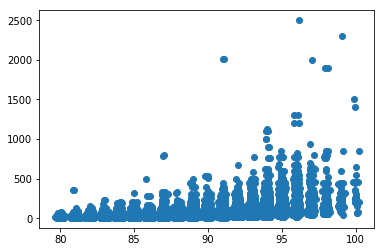

In [6]:
# We try to create a scatter plot of the only 2 numeric features in the dataset
plt.scatter(_df.points, _df.price)
plt.show()

In [7]:
# Create a subset dataset that has price less than or equal to 1000
_df_1000 = _df[_df.price <= 1000]
_df_1000.shape 

(174984, 14)

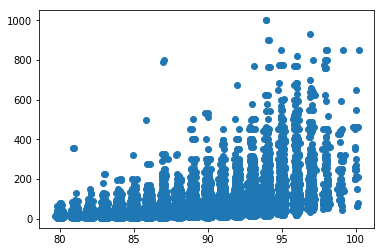

In [8]:
plt.scatter(_df_1000.points, _df_1000.price)
plt.show()

In [9]:
# Import your test dataset 
_test_df2 = pd.read_csv('test.csv', index_col=False)
_test_df2=_test_df2.drop('index', axis = 1)
_test_df2.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1


In [10]:
#drop all null values in the country and variety column
_df_1000=_df_1000.dropna(subset = ['country','variety'])

In [11]:
_df_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174936 entries, 0 to 174999
Data columns (total 14 columns):
country                  174936 non-null object
description              174936 non-null object
designation              122690 non-null object
points                   174936 non-null float64
price                    174936 non-null float64
province                 174936 non-null object
region_1                 146452 non-null object
region_2                 75392 non-null object
taster_name              65457 non-null object
taster_twitter_handle    62138 non-null object
title                    82136 non-null object
variety                  174936 non-null object
winery                   174936 non-null object
id                       174936 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 20.0+ MB


In [12]:
data_conc = pd.concat([_df_1000,_test_df2],ignore_index= True)

# looking at the data

In [13]:
data_conc.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440


### data cleaning

### remove spcial characters


In [16]:
import re

def strip_special_chars(st):
    my_pattern = '[A-Za-z0-9./ ]+'
    return ''.join(re.findall(my_pattern, st))

In [17]:
data_conc['description'][1]

'A solid, chunky wine, with a structure that is full of corners and edges. The tannins are in a dusty, chewy style, balancing with the fresh black fig and sweet plum juice flavors. Rich and concentrated, the wine needs to age.'

In [18]:
data_conc['description'] = data_conc['description'].apply(strip_special_chars)
print(data_conc['description'][0])

This is a fine rich balanced wine. It has ripe fruits that suggest black currants blackberries and a tight stalky mineral element. At the same time its generous full of juicy acidity to contrast with the dusty tannin layer that keeps it all together. Drink now.


In [19]:
Random Forest Regressordata = data_conc[['description','price']]
print(data.shape)
data.head(3)

(258146, 2)


,description,price
0,This is a fine rich balanced wine. It has ripe...,20.0
1,A solid chunky wine with a structure that is f...,28.0
2,This is powerful and concentrated with the hig...,130.0


In [20]:
#feature engineering

def make_lower_case(text):
    return text.lower()

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

data["description"] = data["description"].str.replace('\d+', '')
data["description"] = data.description.apply(func=remove_punctuation)
data["description"] = data.description.apply(func=make_lower_case)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [21]:
tf = TfidfVectorizer(analyzer='word', 
                     min_df=10,
                     ngram_range=(1, 2),
                     stop_words='english')

svd = TruncatedSVD(n_components=12) # No of latent features is an hyper parameter

In [22]:

#Fit tfidf and svd, and transform training data
tfidf_matrix = tf.fit_transform(data.description)

lsa_features = pd.DataFrame(svd.fit_transform(tfidf_matrix))
collist = map(str, range(0,12))
collist = ["latent_description_" + s for s in collist]
lsa_features.columns = collist
lsa_features.head()

,latent_description_0,latent_description_1,latent_description_2,latent_description_3,latent_description_4,latent_description_5,latent_description_6,latent_description_7,latent_description_8,latent_description_9,latent_description_10,latent_description_11
0,0.116263,-0.005234,0.114684,0.053164,0.000125,-0.020137,-0.028172,0.035919,0.049061,0.010837,0.014344,0.034299
1,0.120644,0.018754,0.073461,0.025785,-0.017985,-0.058812,-0.018608,0.013070,0.032532,-0.005763,-0.001933,-0.012335
2,0.129140,0.096255,0.095909,0.014425,0.127234,-0.031209,-0.027284,0.074117,0.017944,0.031781,0.050765,0.030599
3,0.104304,0.062813,0.017444,-0.062404,-0.024373,-0.054476,-0.034257,0.051387,-0.013811,-0.068239,-0.003976,-0.008019
4,0.095339,-0.053985,-0.017274,-0.012295,0.024014,0.022215,0.016192,-0.030240,0.012486,-0.048629,-0.027618,0.014878


In [60]:
#lsa_features['price'] = data_conc.price.values


In [23]:
lsa_features.shape

(258146, 12)

In [24]:
data_conc =pd.concat([data_conc,lsa_features],axis=1)

In [25]:
def sentiment(x):
    if x < 90:
        return 0
    else:
        return 1
data_conc['sentiment'] = data_conc['points'].apply(lambda x: sentiment(x))
data_conc.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,latent_description_3,latent_description_4,latent_description_5,latent_description_6,latent_description_7,latent_description_8,latent_description_9,latent_description_10,latent_description_11,sentiment
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,...,0.053164,0.000125,-0.020137,-0.028172,0.035919,0.049061,0.010837,0.014344,0.034299,0
1,France,A solid chunky wine with a structure that is f...,NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,...,0.025785,-0.017985,-0.058812,-0.018608,0.013070,0.032532,-0.005763,-0.001933,-0.012335,0
2,France,This is powerful and concentrated with the hig...,NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,...,0.014425,0.127234,-0.031209,-0.027284,0.074117,0.017944,0.031781,0.050765,0.030599,1
3,US,Rich ripe and oaky this Petite Sirah charms wi...,Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,...,-0.062404,-0.024373,-0.054476,-0.034257,0.051387,-0.013811,-0.068239,-0.003976,-0.008019,0
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,...,-0.012295,0.024014,0.022215,0.016192,-0.030240,0.012486,-0.048629,-0.027618,0.014878,0


In [26]:
data_conc.points.describe()

count    258146.000000
mean         88.084164
std           3.157086
min          79.636128
25%          85.969326
50%          87.981535
75%          90.087975
max         100.220603
Name: points, dtype: float64

In [27]:
cols_drop = ['description','province','designation','region_1','region_2', 'taster_name', 'taster_twitter_handle','title', 'winery','id']

In [28]:
_data_aftr_drop = pd.get_dummies(data_conc, columns = ['country'])
#_data_aftr_drop = pd.get_dummies(_data_aftr_drop, columns = ['province'])
_data_aftr_drop = pd.get_dummies(_data_aftr_drop, columns = ['variety'])


In [29]:
_data_aftr_drop = _data_aftr_drop.drop(cols_drop, axis =1)


In [30]:
_data_aftr_drop.head()

,points,price,latent_description_0,latent_description_1,latent_description_2,latent_description_3,latent_description_4,latent_description_5,latent_description_6,latent_description_7,...,variety_XYNISTERI,variety_YAPINCAK,variety_ZIBIBBO,variety_ZIERFANDLER,variety_ZIERFANDLER-ROTGIPFLER,variety_ZINFANDEL,variety_ZLAHTINA,variety_ZWEIGELT,variety_ÇALKARASı,variety_ŽILAVKA
0,88.870874,20.0,0.116263,-0.005234,0.114684,0.053164,0.000125,-0.020137,-0.028172,0.035919,...,0,0,0,0,0,0,0,0,0,0
1,88.041695,28.0,0.120644,0.018754,0.073461,0.025785,-0.017985,-0.058812,-0.018608,0.013070,...,0,0,0,0,0,0,0,0,0,0
2,94.085021,130.0,0.129140,0.096255,0.095909,0.014425,0.127234,-0.031209,-0.027284,0.074117,...,0,0,0,0,0,0,0,0,0,0
3,89.869797,34.0,0.104304,0.062813,0.017444,-0.062404,-0.024373,-0.054476,-0.034257,0.051387,...,0,0,0,0,0,0,0,0,0,0
4,89.017651,24.0,0.095339,-0.053985,-0.017274,-0.012295,0.024014,0.022215,0.016192,-0.030240,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#split the dataset into train and test set
labels = _data_aftr_drop[_df_1000.shape[0]:]
predictors = _data_aftr_drop[:_df_1000.shape[0]]

In [32]:
predictors.tail(2)

,points,price,latent_description_0,latent_description_1,latent_description_2,latent_description_3,latent_description_4,latent_description_5,latent_description_6,latent_description_7,...,variety_XYNISTERI,variety_YAPINCAK,variety_ZIBIBBO,variety_ZIERFANDLER,variety_ZIERFANDLER-ROTGIPFLER,variety_ZINFANDEL,variety_ZLAHTINA,variety_ZWEIGELT,variety_ÇALKARASı,variety_ŽILAVKA
174934,90.867770,65.0,0.124184,0.030251,0.055288,-0.035727,-0.080014,0.112759,-0.035050,-0.036532,...,0,0,0,0,0,0,0,0,0,0
174935,91.881217,50.0,0.056781,-0.041341,0.004419,-0.008728,0.005260,-0.004232,-0.006766,-0.000128,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Sample the dataset 80% train, 20% test
_train_df = predictors.sample(frac = 0.8)
_val_df = predictors.drop(_train_df.index)

In [34]:
# Create the train and test sets
X_train = _train_df.drop('price', axis = 1).values
y_train = _train_df['price'].values
X_test = _val_df.drop('price', axis = 1).values
y_test = _val_df['price'].values

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(139949, 804) (139949,)
(34987, 804) (34987,)


In [36]:
# Import an error metric
# Import Linear Regression for training since the task is of continuous output
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Try a Linear Regression 

In [42]:

lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
y_pred2 = lr_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
print(np.sqrt(mse))

29.354997799145888


## Try Decision Tree

In [43]:
# Instantiate the Decision Tree class with or without a max_depth
tree = DecisionTreeRegressor(max_depth=5)
# Fit the model
tree.fit(X_train, y_train)
# Predict using the model
y_pred_3 = tree.predict(X_test)


# Get the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
print(rmse)

27.864304729341523


#  Random Forest Regressor

In [46]:
# Instantiate a forest regressor
forest = RandomForestRegressor(n_estimators=100, max_depth=7)
# Train a regressor model
forest.fit(X_train, y_train)
# Predict on the model
y_pred_4 = forest.predict(X_test)

rmse4 = np.sqrt(mean_squared_error(y_test, y_pred_4))
print(rmse4)

25.826302304938007


In [48]:
data = {'true': y_test, 'prediced': y_pred_4}
pd.DataFrame.from_dict(data).tail()

,true,prediced
34982,10.0,16.133021
34983,40.0,55.826078
34984,36.0,49.879120
34985,55.0,52.844305
34986,19.0,23.042569


In [49]:
# Predict the price using the points feature
forest.predict(labels.drop('price', axis = 1).values)

array([99.49199048, 39.73349372, 32.36786868, ..., 28.33120091,
       16.98489866, 62.87603352])

In [50]:
# Extract the two columns needed for the competition submission and save as a csv file
pd.Series(forest.predict(labels.drop('price', axis = 1).values),name=('price')).to_csv('submission_2310.csv', index=True)